<a href="https://colab.research.google.com/github/Wapsop/Redes-neuronales-1/blob/main/Red_neuronal_convolucional_Clasificaci%C3%B3n_gatos_y_perros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importar librerías necesarias

Primero, importamos las librerías que usaremos para construir y entrenar la CNN.

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


### 2. Definir la arquitectura de la CNN

Construiremos un modelo secuencial con capas convolucionales, capas de pooling y capas densas. Las capas convolucionales detectan patrones, las capas de pooling reducen la dimensionalidad y las capas densas realizan la clasificación final.

In [19]:
model = models.Sequential([
    # Primera capa convolucional y de pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional y de pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Tercera capa convolucional y de pooling
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Aplanar la salida para las capas densas
    layers.Flatten(),

    # Capas densas (fully connected)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Capa de dropout para reducir el sobreajuste
    layers.Dense(1, activation='sigmoid') # Capa de salida: 1 neurona para clasificación binaria (gato/no gato) con sigmoid
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Compilar el modelo

Antes de entrenar, necesitamos compilar el modelo, especificando el optimizador, la función de pérdida y las métricas a monitorear.

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 4. Cargar y preprocesar el conjunto de datos 'Cats vs Dogs'

Usaremos `tensorflow_datasets` para cargar el conjunto de datos 'cats_vs_dogs'. Este dataset contiene imágenes de gatos y perros, perfecto para nuestra tarea de clasificación binaria. Necesitaremos redimensionar y normalizar las imágenes.

In [21]:
import tensorflow_datasets as tfds

# Descargar y cargar el dataset 'cats_vs_dogs'
# `with_info=True` para obtener metadatos sobre el dataset
# `as_supervised=True` para obtener (imagen, etiqueta) directamente
(raw_train, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'], # Usamos el 80% para entrenamiento, 20% para validación
    with_info=True,
    as_supervised=True,
)

#### Inspeccionar el Dataset

Podemos ver algunas características del dataset, como el número de clases y etiquetas.

In [22]:
get_label_name = metadata.features['label'].int2str

print('Ejemplos de etiquetas:')
for image, label in raw_train.take(5):
  print(f"  Imagen: {get_label_name(label)}")

print(f"Número de ejemplos de entrenamiento: {metadata.splits['train'].num_examples * 0.8:.0f}")
print(f"Número de ejemplos de validación: {metadata.splits['train'].num_examples * 0.2:.0f}")

Ejemplos de etiquetas:
  Imagen: dog
  Imagen: dog
  Imagen: dog
  Imagen: cat
  Imagen: dog
Número de ejemplos de entrenamiento: 18610
Número de ejemplos de validación: 4652


#### Funciones de preprocesamiento

Las imágenes deben ser del mismo tamaño y sus valores de píxeles normalizados (escalados de 0-255 a 0-1).

In [23]:
IMG_SIZE = IMG_HEIGHT # Usamos la misma altura/ancho definido previamente

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1 # Normalizar a [-1, 1] o (image / 255.0) para [0,1]
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

#### Aplicar Preprocesamiento y división en lotes

Ahora aplicamos las funciones de preprocesamiento a todo el dataset y lo dividimos en lotes.

In [24]:
BATCH_SIZE = 32 # Define el tamaño del lote

train_batches = raw_train.map(format_example).shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_batches = raw_test.map(format_example).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

#### Visualizar algunos ejemplos preprocesados

Para asegurarnos de que el preprocesamiento fue correcto, visualicemos algunas imágenes del conjunto de entrenamiento.

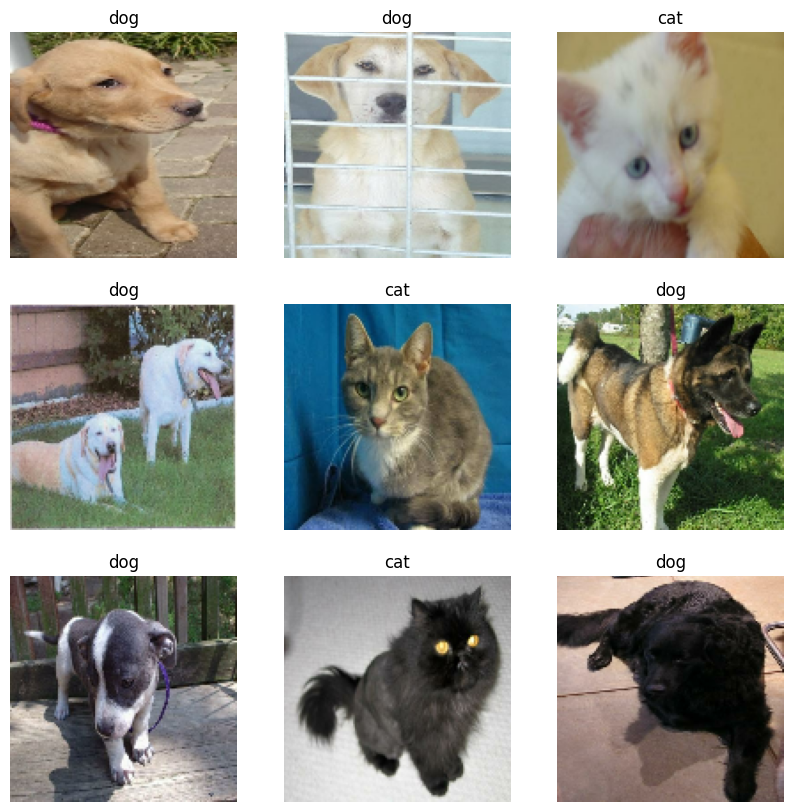

In [25]:
for image_batch, label_batch in train_batches.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # Desnormalizar la imagen para visualización
        plt.imshow((image_batch[i].numpy() + 1) / 2)
        plt.title(get_label_name(label_batch[i].numpy()))
        plt.axis("off")
    plt.show()

### 5. Entrenar el modelo con el Dataset 'Cats vs Dogs'

Ahora que tenemos los datasets de entrenamiento y validación listos, podemos entrenar el modelo que definimos anteriormente.

In [26]:
history = model.fit(
    train_batches,
    epochs=10,
    validation_data=validation_batches
)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.6150 - loss: 0.6497 - val_accuracy: 0.7616 - val_loss: 0.4977
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.7700 - loss: 0.4882 - val_accuracy: 0.7822 - val_loss: 0.4650
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.8166 - loss: 0.4118 - val_accuracy: 0.8285 - val_loss: 0.3817
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.8505 - loss: 0.3439 - val_accuracy: 0.8289 - val_loss: 0.3824
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.8789 - loss: 0.2886 - val_accuracy: 0.8568 - val_loss: 0.3632
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9101 - loss: 0.2170 - val_accuracy: 0.8562 - val_loss: 0.3730
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9354 - loss: 0.1692 - val_accuracy: 0.8618 - val_loss: 0.3675
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.9526 - loss: 0.1293 - 

## Convertir predicciones a clases

Convertir las probabilidades predichas por el modelo a clases binarias (0 o 1) utilizando un umbral (por ejemplo, 0.5).


In [27]:
predicted_classes = (predictions >= 0.5).astype(int)

print("Primeras 5 clases predichas:\n", predicted_classes[:5])
print("Formato de las clases predichas:", predicted_classes.shape)

Primeras 5 clases predichas:
 [[1]
 [1]
 [1]
 [1]
 [1]]
Formato de las clases predichas: (4652, 1)


## Extraer etiquetas verdaderas del conjunto de validación

Extraer las etiquetas verdaderas del conjunto de datos de validación (`validation_batches`).

In [28]:
true_labels = np.concatenate([y for x, y in validation_batches], axis=0)

print("Primeras 5 etiquetas verdaderas:\n", true_labels[:5])
print("Formato de las etiquetas verdaderas:", true_labels.shape)

Primeras 5 etiquetas verdaderas:
 [1 0 1 1 1]
Formato de las etiquetas verdaderas: (4652,)


## Calcular la Matriz de Confusión

Calcular la matriz de confusión utilizando las etiquetas verdaderas (`true_labels`) y las clases predichas (`predicted_classes`).

In [ ]:
from sklearn.metrics import confusion_matrix

# Asegurarse de que predicted_classes tenga la misma forma que true_labels (aplanar si es necesario)
# predicted_classes actualmente es (4652, 1) y true_labels es (4652,)
predicted_classes_flat = predicted_classes.flatten()

cm = confusion_matrix(true_labels, predicted_classes_flat)

print("Matriz de Confusión:")
print(cm)

## Visualizar la Matriz de Confusión

Visualizar la matriz de confusión utilizando `matplotlib` y `seaborn`, etiquetando claramente los ejes para 'cat' y 'dog'.

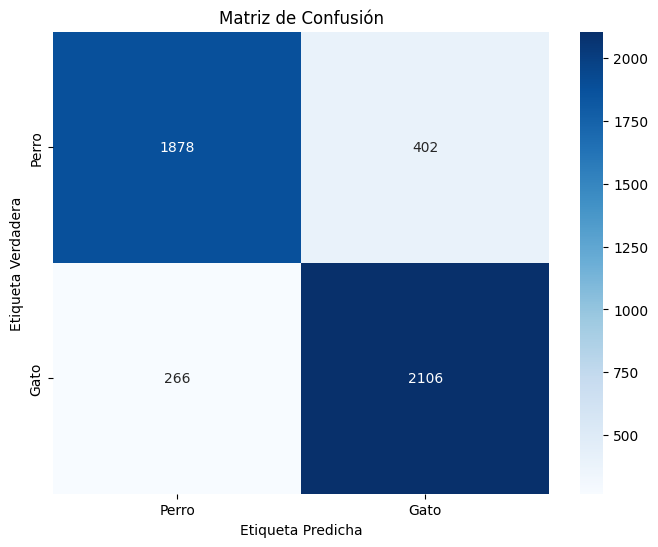

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Asegurarse de importar confusion_matrix

# --- Recalculando cm aquí para asegurar que esté definida ---
# Asumiendo que 'true_labels' y 'predicted_classes' están definidos de celdas anteriores.
predicted_classes_flat = predicted_classes.flatten() # Asegurarse de que predicted_classes esté aplanada
cm = confusion_matrix(true_labels, predicted_classes_flat)
# --- Fin del recálculo ---

# Definir las etiquetas de las clases para una mejor visualización en español
class_names = ['Perro', 'Gato'] # 0: Perro, 1: Gato

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()